Data downloaded from: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = 'drive/My Drive/Colab Notebooks/cancer_patient_datasets.csv'
r_data= pd.read_csv(path)
r_data.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


# Data Prerocessing

In [6]:
r_data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
r_data.shape

(1000, 26)

In [8]:
r_data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# Exploratory Data Analysis

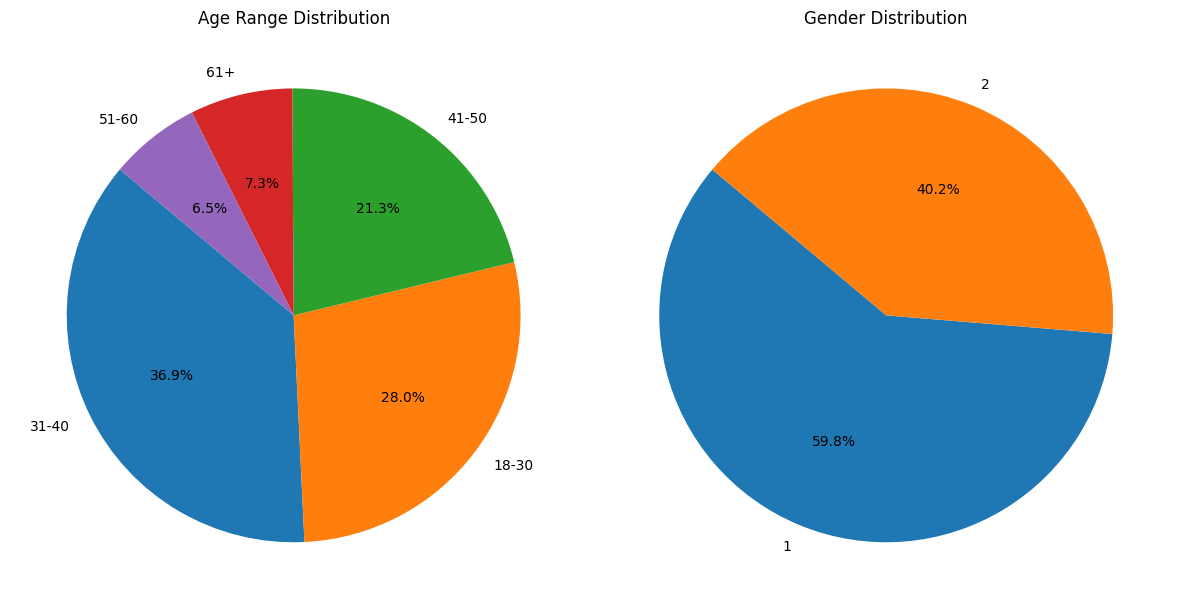

In [9]:
age_ranges = {
    '18-30': (18, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61+': (61, float('inf'))
}
r_data['Age Range'] = pd.cut(r_data['Age'], bins=[age[0] for age in age_ranges.values()] + [float('inf')],
                             labels=age_ranges.keys(), right=False)

age_range_counts = r_data['Age Range'].value_counts()

gender_counts = r_data['Gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Age Range Distribution')

axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

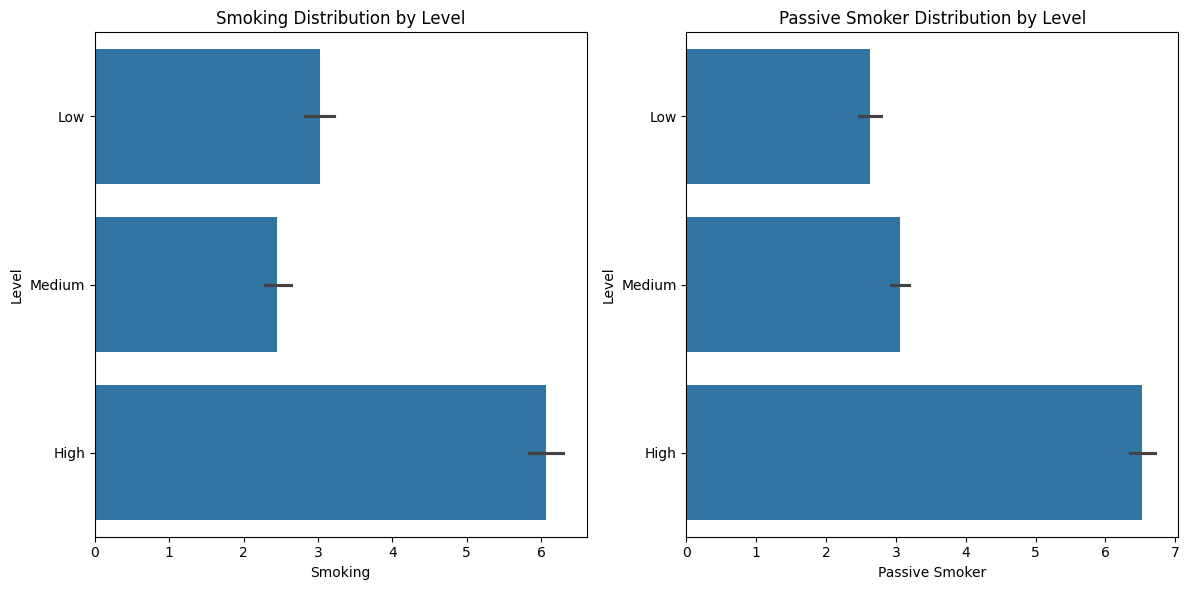

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(y='Level', x='Smoking', data=r_data, ax=axes[0])
axes[0].set_title('Smoking Distribution by Level')
sns.barplot(y='Level', x='Passive Smoker', data=r_data, ax=axes[1])
axes[1].set_title('Passive Smoker Distribution by Level')

plt.tight_layout()
plt.show()

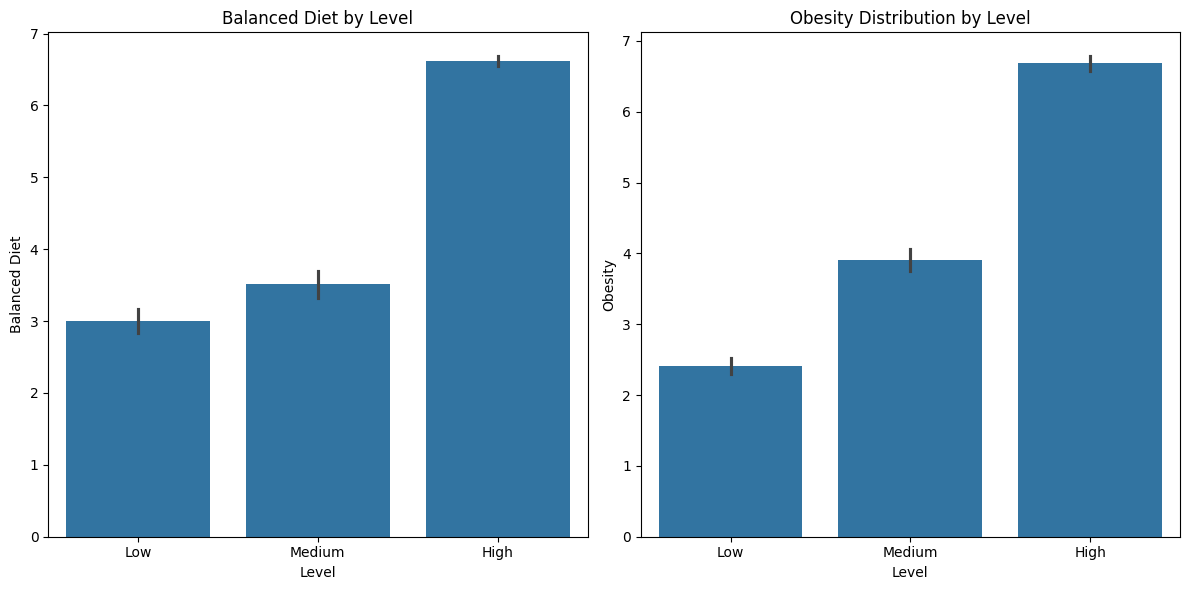

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='Level', y='Balanced Diet', data=r_data, ax=axes[0])
axes[0].set_title('Balanced Diet by Level')
sns.barplot(x='Level', y='Obesity', data=r_data, ax=axes[1])
axes[1].set_title('Obesity Distribution by Level')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [13]:
r_data = r_data.drop('Patient Id', axis=1)
r_data = r_data.drop('Age Range', axis=1)

# Splitting data into features (X) and target variable (y)
X = r_data.drop('Level', axis=1)
y = r_data['Level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Support Vector Classification

In [15]:
svc_classifier = LinearSVC(max_iter=1000000)
svc_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=1000000)

# Make Predictions

In [16]:
svc_predictions = svc_classifier.predict(X_test)

# Evaluate the model

In [17]:
accuracy_score(y_test, svc_predictions)

0.9966666666666667

In [18]:
classification_report(y_test, svc_predictions)

'              precision    recall  f1-score   support\n\n        High       1.00      1.00      1.00       119\n         Low       0.99      1.00      0.99        84\n      Medium       1.00      0.99      0.99        97\n\n    accuracy                           1.00       300\n   macro avg       1.00      1.00      1.00       300\nweighted avg       1.00      1.00      1.00       300\n'

In [19]:
confusion_matrix(y_test, svc_predictions)

array([[119,   0,   0],
       [  0,  84,   0],
       [  0,   1,  96]])

# K Neighbors Classifier

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Make Predictions

In [21]:
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the model

In [22]:
accuracy_score(y_test, knn_predictions)

0.8

In [23]:
classification_report(y_test, knn_predictions)

'              precision    recall  f1-score   support\n\n        High       0.81      0.96      0.88       119\n         Low       0.77      0.86      0.81        84\n      Medium       0.83      0.56      0.67        97\n\n    accuracy                           0.80       300\n   macro avg       0.80      0.79      0.78       300\nweighted avg       0.80      0.80      0.79       300\n'

In [24]:
confusion_matrix(y_test, knn_predictions)

array([[114,   2,   3],
       [  4,  72,   8],
       [ 23,  20,  54]])